### Explore the spatial data we plan to map
***Data from:***

Natural Earth / geojson.xyz

GBIF | Global Biodiversity Information Facility: https://www.gbif.org/ 

NHD Streams - https://gis.utah.gov/data/water/lakes-rivers-dams/

Notebook by Zac Stanley for New Maps Plus - MAP674

#### Initialize python libraries

In [72]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# change default max columns
pd.set_option('display.max_columns', None)

# change default figure size
plt.rcParams['figure.figsize'] = (15,12)

#### Read data as GeoPandas DataFrames  from remote servers and local files

In [73]:
# import us states and provinces
us_states = gpd.read_file ("https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson")

# import utah streams 
utah_streams = gpd.read_file("https://opendata.arcgis.com/datasets/d9b5ac9220ff415994b193c9ce022f86_0.zip")

# import 11 bird species
sw_birds = gpd.read_file('./data/11birdspecies_southwest.csv', encoding='UTF-8')

#### Inspect the object type returned from read_file() for U.S. States

In [74]:
type(us_states)

geopandas.geodataframe.GeoDataFrame

In [75]:
# check coordinate reference system
us_states.crs # {'init': 'epsg:4326'} web mercator

{'init': 'epsg:4326'}

In [76]:
us_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   scalerank     51 non-null     int64   
 1   adm1_code     51 non-null     object  
 2   diss_me       51 non-null     int64   
 3   adm1_cod_1    51 non-null     object  
 4   iso_3166_2    51 non-null     object  
 5   wikipedia     51 non-null     object  
 6   sr_sov_a3     51 non-null     object  
 7   sr_adm0_a3    51 non-null     object  
 8   iso_a2        51 non-null     object  
 9   adm0_sr       51 non-null     int64   
 10  admin0_lab    51 non-null     int64   
 11  name          51 non-null     object  
 12  name_alt      51 non-null     object  
 13  name_local    0 non-null      object  
 14  type          51 non-null     object  
 15  type_en       51 non-null     object  
 16  code_local    51 non-null     object  
 17  code_hasc     51 non-null     object  
 18  note

In [77]:
us_states.head()

,scalerank,adm1_code,diss_me,adm1_cod_1,iso_3166_2,wikipedia,sr_sov_a3,sr_adm0_a3,iso_a2,adm0_sr,admin0_lab,name,name_alt,name_local,type,type_en,code_local,code_hasc,note,hasc_maybe,region,region_cod,region_big,big_code,provnum_ne,gadm_level,check_me,scaleran_1,datarank,abbrev,postal,area_sqkm,sameascity,labelrank,featurec_1,admin,name_len,mapcolor9,mapcolor13,featureclass,geometry
0,2,USA-3514,3514,USA-3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US1,USA,US,1,2,Minnesota,MN|Minn.,None,State,State,US32,US.MN,None,None,Midwest,None,West North Central,None,0,1,10,2,1,Minn.,MN,0,-99,0,Admin-1 scale rank,United States of America,9,1,1,Admin-1 scale rank,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,2,USA-3515,3515,USA-3515,US-MT,http://en.wikipedia.org/wiki/Montana,US1,USA,US,1,2,Montana,MT|Mont.,None,State,State,US30,US.MT,None,None,West,None,Mountain,None,0,1,0,2,1,Mont.,MT,0,-99,0,Admin-1 scale rank,United States of America,7,1,1,Admin-1 scale rank,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,2,USA-3516,3516,USA-3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US1,USA,US,1,2,North Dakota,ND|N.D.,None,State,State,US38,US.ND,None,None,Midwest,None,West North Central,None,0,1,0,2,1,N.D.,ND,0,-99,0,Admin-1 scale rank,United States of America,12,1,1,Admin-1 scale rank,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,2,USA-3517,3517,USA-3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US1,USA,US,8,2,Hawaii,HI|Hawaii,None,State,State,US15,US.HI,None,None,West,None,Pacific,None,0,1,0,2,1,Hawaii,HI,0,-99,0,Admin-1 scale rank,United States of America,6,1,1,Admin-1 scale rank,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,2,USA-3518,3518,USA-3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US1,USA,US,1,2,Idaho,ID|Idaho,None,State,State,US16,US.ID,None,None,West,None,Mountain,None,0,1,0,2,1,Idaho,ID,0,-99,0,Admin-1 scale rank,United States of America,5,1,1,Admin-1 scale rank,"POLYGON ((-111.04973 44.48816, -111.05024 42.0..."


#### Plot us_states

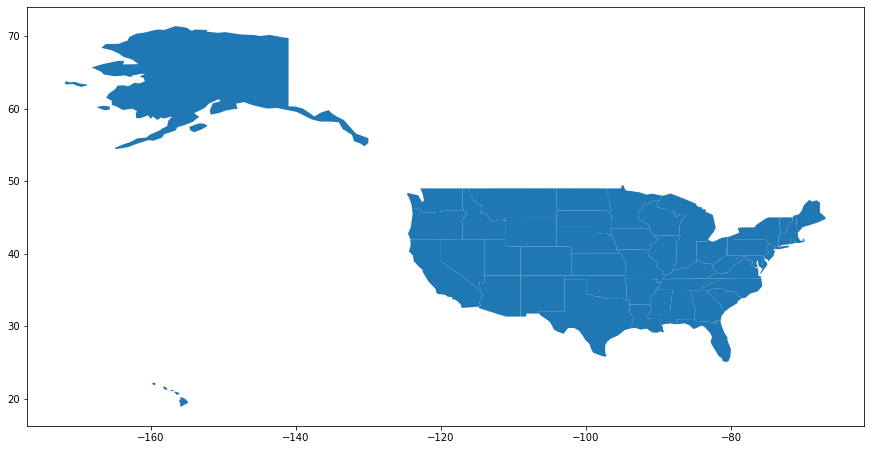

In [78]:
us_states.plot(figsize=(15,15));

#### Create state of Utah boundary

In [79]:
# extract geoseries of Utah
utah = us_states[us_states['name']=='Utah']

#### Plot utah

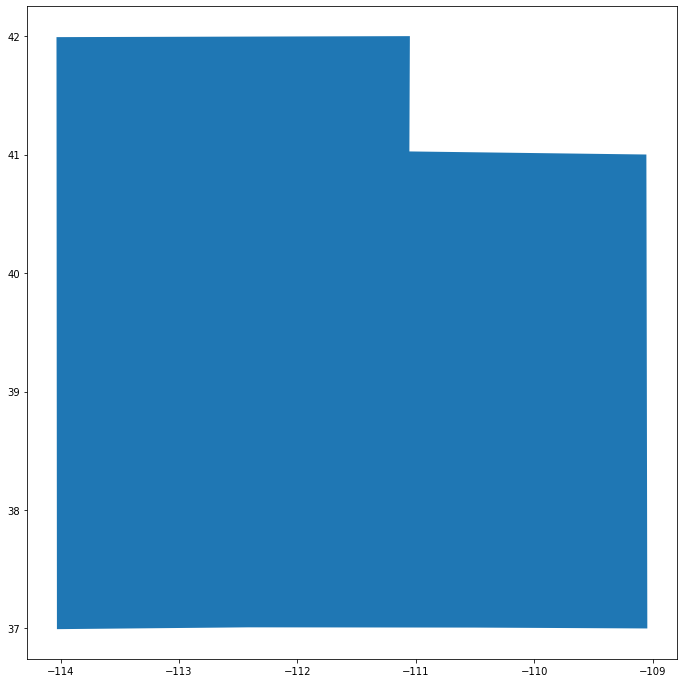

In [80]:
utah.plot();

#### Write utah to geoJSON

In [90]:
utah.to_file("./data/utah.geojson", driver='GeoJSON')

#### Inspect the object type returned from read_file() for Utah Streams

In [81]:
type(utah_streams)

geopandas.geodataframe.GeoDataFrame

In [82]:
# check coordinate reference system
utah_streams.crs # {'init': 'epsg:4326'} web mercator

{'init': 'epsg:4326'}

In [83]:
utah_streams.info() # 541,604 records, we need to slim this down

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 541604 entries, 0 to 541603
Data columns (total 20 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    541604 non-null  int64   
 1   Permanent_  541604 non-null  object  
 2   FDate       541604 non-null  object  
 3   Resolution  541604 non-null  int64   
 4   GNIS_ID     78969 non-null   object  
 5   GNIS_Name   78972 non-null   object  
 6   LengthKM    541604 non-null  float64 
 7   ReachCode   541604 non-null  object  
 8   FlowDir     541604 non-null  int64   
 9   WBArea_Per  68747 non-null   object  
 10  FType       541604 non-null  int64   
 11  FType_Text  541604 non-null  object  
 12  FCode       541604 non-null  int64   
 13  FCode_Text  541604 non-null  object  
 14  Enabled     0 non-null       object  
 15  InUtah      541604 non-null  int64   
 16  IsMajor     541604 non-null  int64   
 17  Submerged   541604 non-null  int64   
 18  SHAPE_Leng  5416

In [84]:
utah_streams.head()

,OBJECTID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Per,FType,FType_Text,FCode,FCode_Text,Enabled,InUtah,IsMajor,Submerged,SHAPE_Leng,geometry
0,1,71413725,2015-11-17,2,None,None,9.058000,15010010013586,1,None,460,Stream/River,46007,Stream/River - Ephemeral,None,0,0,0,0.085565,"LINESTRING (-114.15119 36.66782, -114.15233 36..."
1,2,71413763,2016-03-28,2,None,None,5.726903,15010010007357,1,None,460,Stream/River,46007,Stream/River - Ephemeral,None,0,0,0,0.053588,"LINESTRING (-114.12500 36.70424, -114.12581 36..."
2,3,71382735,2016-03-28,2,None,None,7.138500,15010010007344,1,None,460,Stream/River,46007,Stream/River - Ephemeral,None,0,0,0,0.067250,"LINESTRING (-114.08703 36.70760, -114.08700 36..."
3,4,71382645,2015-11-17,2,None,None,7.208000,15010010007315,1,None,460,Stream/River,46007,Stream/River - Ephemeral,None,0,0,0,0.069461,"LINESTRING (-114.04702 36.64669, -114.04699 36..."
4,5,71373853,2015-11-17,2,None,None,4.285000,15010010001808,1,None,460,Stream/River,46007,Stream/River - Ephemeral,None,1,0,0,0.047022,"LINESTRING (-113.94682 37.11958, -113.94694 37..."


#### Plot utah_streams

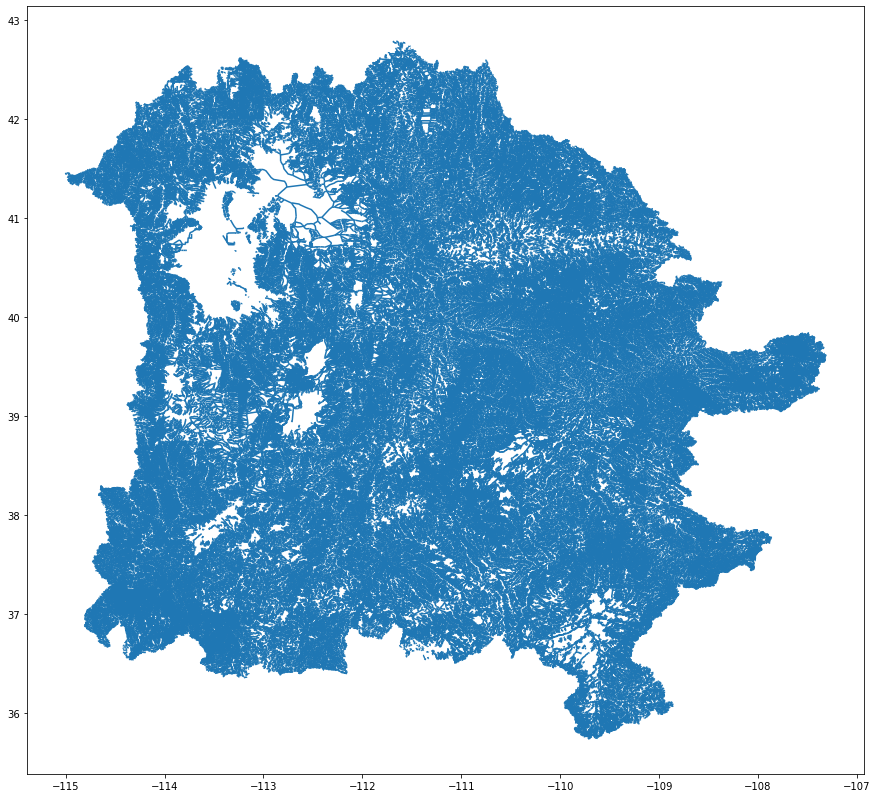

In [85]:
utah_streams.plot(figsize=(15,15));

#### Use a conditional statement to select a subset of major streams from utah_streams

In [86]:
utah_major_streams = utah_streams[(utah_streams['FType_Text']=='Stream/River') & (utah_streams['IsMajor'] == 1)]

#### Inspect the object type returned from conditional statement creating for utah_major_streams

In [87]:
utah_major_streams.info() # 19,395 records is much more reasonable

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 19395 entries, 199 to 540363
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    19395 non-null  int64   
 1   Permanent_  19395 non-null  object  
 2   FDate       19395 non-null  object  
 3   Resolution  19395 non-null  int64   
 4   GNIS_ID     15300 non-null  object  
 5   GNIS_Name   15300 non-null  object  
 6   LengthKM    19395 non-null  float64 
 7   ReachCode   19395 non-null  object  
 8   FlowDir     19395 non-null  int64   
 9   WBArea_Per  35 non-null     object  
 10  FType       19395 non-null  int64   
 11  FType_Text  19395 non-null  object  
 12  FCode       19395 non-null  int64   
 13  FCode_Text  19395 non-null  object  
 14  Enabled     0 non-null      object  
 15  InUtah      19395 non-null  int64   
 16  IsMajor     19395 non-null  int64   
 17  Submerged   19395 non-null  int64   
 18  SHAPE_Leng  19395 non-null  float64

#### Plot utah_major_streams

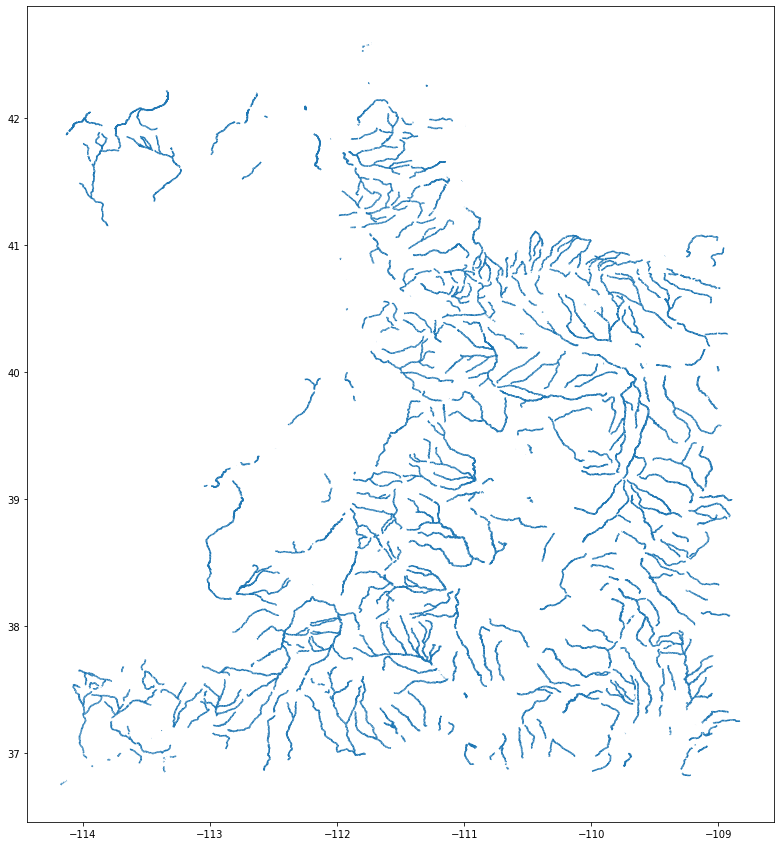

In [88]:
utah_major_streams.plot(figsize=(15,15));

#### Write utah_major_streams to geoJSON

In [89]:
utah_major_streams.to_file("./data/utah_major_streams.geojson", driver='GeoJSON')

#### Inspect the object type returned from read_file() for 11 bird species

In [25]:
# adding encoding to UTF-8 allows geoJSON export later in notebook
sw_birds = gpd.read_file('./data/11birdspecies_southwest.csv', encoding='UTF-8')

In [26]:
type(sw_birds)

geopandas.geodataframe.GeoDataFrame

In [37]:
# check coordinate reference system
sw_birds.crs # hrm, no crs. geometry is being read in wrong?

{}

In [27]:
sw_birds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27975 entries, 0 to 27974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   field_1                 27975 non-null  object  
 1   individualCount         27975 non-null  object  
 2   occurrenceStatus        27975 non-null  object  
 3   year                    27975 non-null  object  
 4   month                   27975 non-null  object  
 5   day                     27975 non-null  object  
 6   stateProvince           27975 non-null  object  
 7   county                  27975 non-null  object  
 8   locality                27975 non-null  object  
 9   decimalLatitude         27975 non-null  object  
 10  decimalLongitude        27975 non-null  object  
 11  scientificName          27975 non-null  object  
 12  vernacularName          27975 non-null  object  
 13  verbatimScientificName  27975 non-null  object  
 14  geometry      

### Fix geometry of sw_birds

#### Convert lat/lon values to floating point

In [41]:
sw_birds[["decimalLatitude", "decimalLongitude"]] = sw_birds[["decimalLatitude", "decimalLongitude"]].apply(pd.to_numeric)

#### Verify floating point conversion

In [42]:
sw_birds.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27975 entries, 0 to 27974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   field_1                 27975 non-null  object  
 1   individualCount         27975 non-null  object  
 2   occurrenceStatus        27975 non-null  object  
 3   year                    27975 non-null  object  
 4   month                   27975 non-null  object  
 5   day                     27975 non-null  object  
 6   stateProvince           27975 non-null  object  
 7   county                  27975 non-null  object  
 8   locality                27975 non-null  object  
 9   decimalLatitude         27975 non-null  float64 
 10  decimalLongitude        27975 non-null  float64 
 11  scientificName          27975 non-null  object  
 12  vernacularName          27975 non-null  object  
 13  verbatimScientificName  27975 non-null  object  
 14  geometry      

#### Apply decimalLatitude and decimalLongitude to geometry column 

In [43]:
sw_birds = gpd.GeoDataFrame(
    sw_birds, geometry=gpd.points_from_xy(x=sw_birds.decimalLongitude, y=sw_birds.decimalLatitude))

#### Plot sw_birds

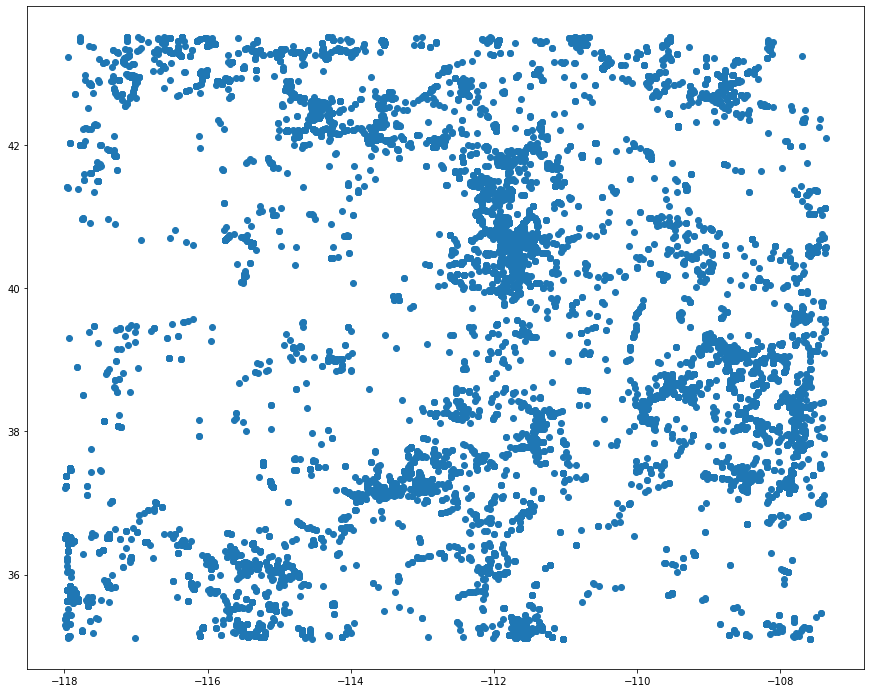

In [67]:
sw_birds.plot(figsize=(15,15));

#### Write sw_birds to geoJSON

In [66]:
sw_birds.to_file("./data/sw_birds.geojson", driver='GeoJSON')